# Домашнее задание по статистическому анализу на python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

***1. Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot).***

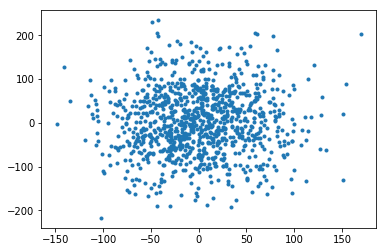

In [3]:
# 1. Генерация выборок с норм. распредлением с помощью scipy.stats
count = 1000
mu_x, sigma_x = 0, 50
mu_y, sigma_y = 0, 75
norm_x = sts.norm(loc = mu_x, scale = sigma_x).rvs(size = count)             #mu = 0, sigma = 50, кол-во элементов = 1000
norm_y = sts.norm(loc = mu_y, scale = sigma_y).rvs(size = count)             #mu = 0, sigma = 75, кол-во элементов = 1000
plt.scatter(norm_x, norm_y, marker = ".")

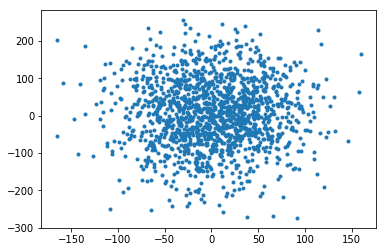

In [4]:
# 2. Генерация выборок с норм. распредлением с помощью numpy random
count_2 = 1500
mu_x2, sigma_x2 = 0, 50
mu_y2, sigma_y2 = 0, 90
norm_x2 = np.random.normal(mu_x2, sigma_x2, count_2)             #mu = 0, sigma = 50, кол-во элементов = 1500
norm_y2 = np.random.normal(mu_y2, sigma_y2, count_2)             #mu = 0, sigma = 90, кол-во элементов = 1500
plt.scatter(norm_x2, norm_y2, marker = ".")

***2.Нарисовать плотность распределения полученной выборки x.***

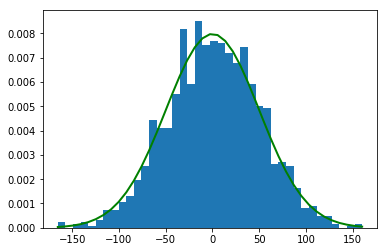

In [5]:
count, bins, ignored = plt.hist(norm_x2, 40, density = True)
plt.plot(bins, 1/(sigma_x2 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu_x2)**2 / (2 * sigma_x2**2) ), # распределение Гаусса
         linewidth=2, color='g')
plt.show()

***3. Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки.***

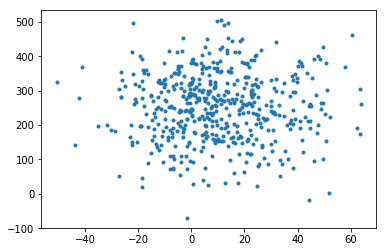

In [27]:
sigma_x, sigma_y = 20, 100
x = np.random.normal(10, sigma_x, 500)
y = np.random.normal(250, sigma_y, 500)
plt.scatter(x, y, marker = ".")

In [28]:
# посчитать ковариацию переменных (разброс относительно друг друга)
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# матрица ковариаций
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# считаем матрицу ковариаций для вектора X
X = np.vstack((x, y)).T
cov_mat(X.T)

array([[3.98649911e+02, 9.02658550e+00],
       [9.02658550e+00, 9.67040277e+03]])

array([[6.37839858e+07, 3.61063420e+07],
       [3.61063420e+07, 9.67040277e+11]])

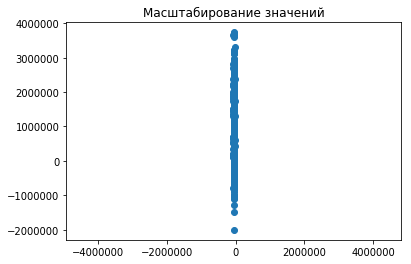

In [33]:
# центрирование переменных
X = X - np.mean(X)

# Матрица масштабирования
sx, sy = sigma_x**2, sigma_y**2
Scale = np.array([[sx, 0], [0, sy]])

# Умножаем матрицу на исходную матрицу
Y = X.dot(Scale)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Масштабирование значений')
plt.axis('equal')

# Calculate covariance matrix
cov_mat(Y.T)

***4. Построить график зависимости (корелляции) x от y.***

Как я поняла, это как раз график, который получился выше.

***5. Нарисовать плотность распределения полученной выборки x. Сравнить с предыдущим графиком x.***

(array([ 1.,  0.,  2.,  1.,  0.,  1.,  1.,  2.,  7.,  5.,  9., 15., 12.,
        17., 20., 22., 26., 37., 20., 35., 32., 24., 25., 20., 24., 28.,
        20., 10., 15.,  9.,  7., 12., 10.,  9.,  7.,  9.,  0.,  1.,  1.,
         4.]), array([-60.5234206 , -57.65745346, -54.79148631, -51.92551917,
        -49.05955202, -46.19358487, -43.32761773, -40.46165058,
        -37.59568344, -34.72971629, -31.86374915, -28.997782  ,
        -26.13181485, -23.26584771, -20.39988056, -17.53391342,
        -14.66794627, -11.80197913,  -8.93601198,  -6.07004483,
         -3.20407769,  -0.33811054,   2.5278566 ,   5.39382375,
          8.2597909 ,  11.12575804,  13.99172519,  16.85769233,
         19.72365948,  22.58962662,  25.45559377,  28.32156092,
         31.18752806,  34.05349521,  36.91946235,  39.7854295 ,
         42.65139664,  45.51736379,  48.38333094,  51.24929808,
         54.11526523]), <a list of 40 Patch objects>)

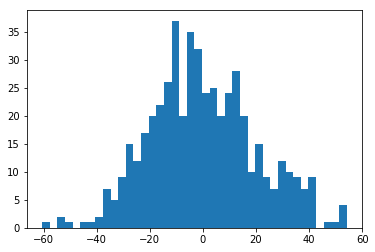

In [36]:
plt.hist(x,40)

(array([ 1.,  0.,  2.,  1.,  0.,  1.,  1.,  2.,  7.,  5.,  9., 15., 12.,
        17., 20., 22., 26., 37., 20., 35., 32., 24., 25., 20., 24., 28.,
        20., 10., 15.,  9.,  7., 12., 10.,  9.,  7.,  9.,  0.,  1.,  1.,
         4.]),
 array([-72652.55917727, -71506.17231898, -70359.78546068, -69213.39860238,
        -68067.01174408, -66920.62488579, -65774.23802749, -64627.85116919,
        -63481.46431089, -62335.0774526 , -61188.6905943 , -60042.303736  ,
        -58895.9168777 , -57749.5300194 , -56603.14316111, -55456.75630281,
        -54310.36944451, -53163.98258621, -52017.59572792, -50871.20886962,
        -49724.82201132, -48578.43515302, -47432.04829473, -46285.66143643,
        -45139.27457813, -43992.88771983, -42846.50086154, -41700.11400324,
        -40553.72714494, -39407.34028664, -38260.95342835, -37114.56657005,
        -35968.17971175, -34821.79285345, -33675.40599516, -32529.01913686,
        -31382.63227856, -30236.24542026, -29089.85856197, -27943.47170367,
      

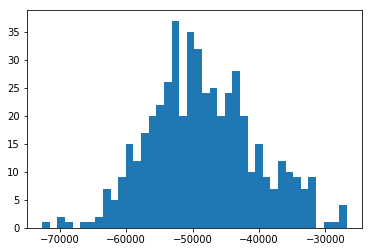

In [42]:
plt.hist(Y[:,0],40)

Графики получились одинаковые, но диапазоны значений - разные. Почему - я не до конца поняла.
Видимо, это му причина само масштабирование. Но зачем оно сделано и что оно показало - до конца не поняла.

***6. Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? Отрицательное? 0?***

0.004597326869251531


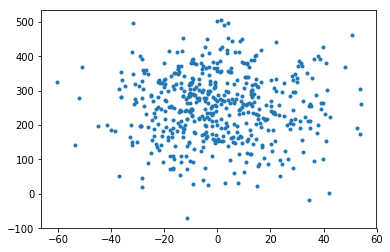

In [45]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print(corr)

Коэффициент корреляции имеет положительный знак, но близок к нулю -> Выборки не имеют корреляции, их значения не зависят друг от друга.

***7. Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?***

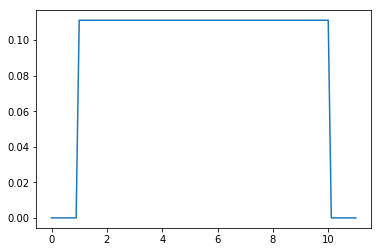

In [58]:
a = 1
b = 10

uniform_rv = sts.uniform(a, b-a)
uniform_rv.rvs(100)

x = np.linspace(0, 11, 100)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

На отрезке [0,10] значения выборки принимают одно и то же значение в отличие от выборки в нормальном распределении 


***8. Найти на графике примеры выброса. Что они означают?***
<img src = "1.png"/>

Выбросами являются 4 точки: (0, 98), (40, 81), (79, 0), (83, 10).
Данные точки значительно отклонены от среднего значения выборки. 
Их наличие означает, что 
 - либо при получении данных были получены какие-то нехарактерные результаты (причины могут трактоваться условиями проведения эксперимента и получения данных);
 - либо измеряемым данным характерны подобные выбросы, и нужно их изучать дополнительно;
 - либо в выборке имеются ошибочные данные, которые попали в нее в следствие какого-то сбоя.

***9. Найти корелляцию в следующих данных: ***

In [62]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [65]:
#нормализация данных
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:10])

          0         1
0  0.000046  0.316726
1  0.000030  0.323843
2  0.000035  0.174377
3  0.000050  0.227758
4  0.000041  0.298932
5  0.000052  0.291815
6  0.000060  0.195730
7  0.000031  0.192171
8  0.000045  0.206406
9  0.000037  0.224199


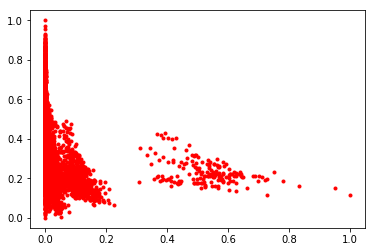

In [71]:
plt.plot(df_norm[0], df_norm[1], 'r.')

Как видно, что корреляцию можно отметить только на части выборки (в нормализованных значениях  - от 0,3 до 1,0 значения стоимости авокадо 4046) - можно заметить отрицательную зависимость: чем больше цена данного авокадо, тем меньше средняя цена.

Для проверки - рассчитаю коээфициент корреляции Пирсона для выборок:

In [72]:
corr, p_value = pearsonr(df_norm[0], df_norm[1])
corr

-0.2083170484878848

Как видим, значение коэффициента корреляции Пирсона отрицательно. Значение 0,2 говорит об очень слабой корреляции.
Это объясняется тем, что основное скопление точек находится в диапазоне нормализованных значений стоимости авокадо от 0 до 0,2, где корреляция отсутсвует.